# Cohort Analysis

## Introduction to Cohort Analysis
El cohort analysis ayuda a profundizar en los hábitos de compra de los clientes y descrubrir información procesable. <br>

¿Qué es el cohort analysis?
- Es una herramienta de análisis descriptivo, agrupa a los clientes en cohortes mutuamente excluyentes, que luego se miden a lo largo del tiempo.
- El análisis de cohortes proporciona información más profunda que las vanity metrics. 
- Ayuda a comprender mejor las tendencias de alto nivel al **proporcionar información sobre las métricas tanto del producto como del ciclo de vida del cliente**.


### Tipos de Cohorts
- **Time cohorts**: Son clientes que se suscribieron a un producto o servicio durante un periodo de tiempo determinado. El análisis de estos cohorts muestra el comportamiendo de los clientes dependiendo del momento en el que comenzaron a utilizar los productos o servicios de la empresa. El tiempo puede ser mensual o trimestral, incluso diario.
- **Behavior cohorts**: Son clientes que compraron un producto o se suscribieron a un servicio en el pasado. Agrupa a los clientes por el tipo de producto o servicio que contrataron. Los clientes que se suscribieron a los servicios de nivel básico pueden tener necesidades diferentes a las de aquellos que se inscribieron en servicios avanzados
- **Size cohorts**: Se refieren a los distintos tamaños de clientes que compran los productos o servicios de la empresa. Esta categorización se puede basar en la cantidad de gasto en algún período de tiempo después de adquisición, o el tipo de producto en el que el cliente gastó la mayor parte del monto de su pedido en algún período de tiempo.

### Elementos del Cohort Analysis
Los datos del cohort analysis normalmente tienen el formato de una tabla dinámica. El row value (index) representa el cohort, los nombres de las columnas representan los periodos (meses,semanas,días,horas,minutos,etc.) desde la adquisición. Y los valores de la tabla son la métrica a analizar (i.e. Clientes activos, rentabilidad_promedio,etc.).
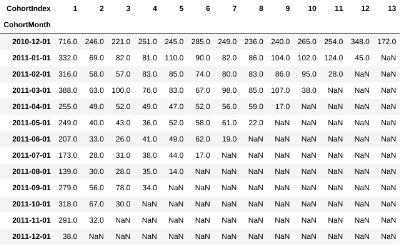

## Time Cohorts
El tipo de cohort análisis más popular.
Los time cohorts agrupan a los clientes en el momento en que realizaron su primera actividad.

### Ejercicio - Time Cohorts
Segmentaremos a los clientes en cohorts de adquisición en función del mes que realizaron su primera compra. Le asignaremos el indice de cohort a cada compra y marcaremos cada transacción en función de su período de tiempo relativo desde la primera compra. En este ejemplo, calcularemos el número de meses desde la adquisición. En el siguiente pasom calcularemos métricas como la retención o el valor del gasto promedio y crearemos un mapa de calor.


#### Importamos librerías y la data

In [18]:
# Importamos el Online Retail Dataset (un set muy popular para segmentación) del UCI ML Repository (un repositorio muy popular para practicar)
# Link: https://archive.ics.uci.edu/dataset/352/online+retail
import pandas as pd
import datetime as dt

df = pd.read_excel('Datasets/Online_Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


#### Análisis

Agregamos el mes de adquisición, con el cual se definen los cohorts.

In [37]:
# Primero, creamos una función que trunca un objeto de fecha al primer día del mes.
def get_month(x): 
    return dt.datetime(x.year,x.month,1)

# Aplicamos la función para crear la columna InvoiceMonth que tiene la fecha truncada por mes.
df['InvoiceMonth'] = df['InvoiceDate'].apply(get_month)

# Creamos un groupby object con customerID y usamos la columna InvoiceMonth para la manipulación adicional.
grouping = df.groupby('CustomerID')['InvoiceMonth'] #Tenemos el groupby object, pero falta definir el agregado

#Utilizamos Transform junto con la función min para asifnar el valor más pequeño a cada cliente.
df['CohortMonth'] = grouping.transform('min') # Con transform podemos definir el agregado, puedes usar funciones como len, min, max, sum, np.sqrt, np.exp, etc.

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0


Creamos la diferencia de tiempo desde la adquisición hasta el final del tiempo analizado.

In [44]:
# Creamos una función auxiliar para extraer año, mes y día de un objeto datetime en valores enteros.
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

# Obtenemos el año y el mes de adquisición y de cohorte
invoice_year, invoice_month, _ = get_date_int(df, 'InvoiceMonth')
cohort_year, cohort_month, _ = get_date_int(df, 'CohortMonth')

# Calculamos la diferencia en años y en meses de ambas.
years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month

#Calculamos y definimos el offset.
df['CohortIndex'] = years_diff * 12 + months_diff + 1 # El 1 al final es para que el primer mes se marque como 1 en lugar de 0 para facilitar la interpretación
 
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0


Calculamos el número de clientes actuvis mensualmente para cada cohort

In [42]:
# Creamos un groupby object con CohortMonth y CohortIndex
grouping = df.groupby(['CohortMonth','CohortIndex'])

# Contamos el número de clientes en cada grupo aplicando la función pandas nunique()
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique)

# Reseteamos el index
cohort_data = cohort_data.reset_index()

# Creamos el pivot table
cohort_counts = cohort_data.pivot(index='CohortMonth',
                                  columns='CohortIndex',
                                  values='CustomerID')
cohort_counts

CohortIndex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
CohortMonth,,,,,,,,,,,,,
2010-12-01,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02-01,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03-01,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04-01,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05-01,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


 **Nota: convertir los Cohorts Index a int**